# Riesgo Crediticio — Definiciones Básicas

A continuación se presentan las definiciones fundamentales del riesgo crediticio, usadas en Basilea y en modelos internos (PD, EAD, LGD, EL y UL).

---

## 1. **PD — Probability of Default (Probabilidad de Default)**

$$
PD = P(\text{default dentro del horizonte})
$$

- Es la **probabilidad** de que un cliente/operación entre en _default_ dentro del horizonte de tiempo (generalmente 12 meses).
- Ejemplo: `PD = 0.03` → 3% de probabilidad de default anual.

---

## 2. **EAD — Exposure At Default (Exposición al Default)**

$$
EAD = \text{monto expuesto en caso de default}
$$

- Representa cuánto dinero está en riesgo si ocurre un default.
- Para préstamos amortizables → saldo pendiente.  
- Para líneas de crédito → incluye uso actual + uso potencial mediante el CCF.

---

## 3. **LGD — Loss Given Default (Pérdida Dada el Default)**

$$
LGD = \frac{\text{pérdida neta final}}{EAD}
$$

- Mide la fracción del EAD que realmente se pierde tras recuperaciones, garantías, etc.
- Valores comunes: 0.20–0.60 dependiendo del tipo de crédito.

---

## 4. **EL — Expected Loss (Pérdida Esperada)**

$$
EL = PD \times EAD \times LGD
$$

- Es la pérdida promedio esperada por el banco.
- Se relaciona con provisiones contables.
- Ejemplo:

$$
PD = 0.05,\quad EAD = 100000,\quad LGD = 0.40
$$
$$
EL = 0.05 \cdot 100000 \cdot 0.40 = 2000
$$

---

## 5. **UL — Unexpected Loss (Pérdida No Esperada)**

$$
UL = \sqrt{ (EAD \cdot LGD)^2 \cdot PD(1 - PD) }
$$

- Es la volatilidad de la pérdida, es decir, la parte **no esperada**.
- Basilea utiliza UL para definir los requerimientos de **capital regulatorio**.
- Representa pérdidas adversas pero plausibles.

---

##  **Resumen General**

| Sigla | Nombre | Qué mide | Fórmula |
|-------|--------|----------|---------|
| **PD** | Probability of Default | Prob. de caer en default | — |
| **EAD** | Exposure at Default | Monto expuesto al default | — |
| **LGD** | Loss Given Default | % de pérdida condicional al default | Pérdida / EAD |
| **EL** | Expected Loss | Pérdida promedio esperada | PD·EAD·LGD |
| **UL** | Unexpected Loss | Pérdida inesperada (riesgo de cola) | \(\sqrt{(EAD·LGD)^2 PD(1−PD)}\) |

---


| Caso   | Real | Predicho | Significado                                                 |
| ------ | ---- | -------- | ----------------------------------------------------------- |
| **TP** | 1    | 1        | Cliente defaultea y el modelo lo predijo (acierto)          |
| **FP** | 0    | 1        | El modelo lo marca como riesgoso pero paga (falso positivo) |
| **TN** | 0    | 0        | Modelo predice que paga y paga                              |
| **FN** | 1    | 0        | Cliente defaultea pero modelo no lo vio (falso negativo)    |


## Ejemplo - German Credit Dataset (OpenML)

Utilizo `fetch_openml` para descargar el dataset público **German Credit**.

Este dataset contiene 1.000 solicitudes de crédito en Alemania, con 20 variables
explicativas relacionadas con el perfil socioeconómico, historial financiero,
capacidad de pago y propósito del préstamo. La variable objetivo ("class")
indica si el cliente fue "good" (no default) o "bad" (default).

Es un dataset ampliamente utilizado en investigación y práctica para
modelos de probabilidad de default (PD), regresión logística, curvas ROC,
KS, calibración y scorecards.


In [4]:
from sklearn.datasets import fetch_openml
df = fetch_openml("credit-g", version=1, as_frame=True).frame

In [2]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [10]:
df.info()
df["class"].value_counts()

# 700 No default
# 300 Default

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   int64   
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   int64   
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   int64   
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   int64   
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   int64   
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

class
good    700
bad     300
Name: count, dtype: int64

| Variable                 | Tipo        | Descripción                                                                 |
|-------------------------|-------------|-----------------------------------------------------------------------------|
| checking_status         | Categórica  | Estado de la cuenta corriente del cliente (saldo, sin cuenta, negativo).    |
| duration                | Numérica    | Duración del crédito solicitado (en meses).                                 |
| credit_history          | Categórica  | Historial crediticio previo (pagó bien, retrasos, créditos existentes).     |
| purpose                 | Categórica  | Propósito del préstamo (auto, muebles, educación, radio/TV, etc.).          |
| credit_amount           | Numérica    | Monto total del crédito solicitado.                                         |
| savings_status          | Categórica  | Nivel de ahorros declarados (desconocido, <100, 100–500, etc.).             |
| employment              | Categórica  | Antigüedad laboral del cliente (años trabajando).                           |
| installment_commitment  | Numérica    | Cuota como % del ingreso disponible (1–4).                                  |
| personal_status         | Categórica  | Estado civil y género (hombre soltero, mujer casada, etc.).                 |
| other_parties           | Categórica  | Existencia de codeudores o garantes.                                        |
| residence_since         | Numérica    | Tiempo viviendo en la residencia actual (en años).                          |
| property_magnitude      | Categórica  | Tipo de propiedad del cliente (inmueble, auto, ahorros, etc.).             |
| age                     | Numérica    | Edad del solicitante.                                                       |
| other_payment_plans     | Categórica  | Otros planes de pago (banco, tienda, ninguno).                              |
| housing                 | Categórica  | Tipo de vivienda (propia, alquilada o gratuita).                            |
| existing_credits        | Numérica    | Cantidad de créditos existentes del cliente.                                |
| job                     | Categórica  | Tipo de empleo (desempleado, no calificado, calificado, directivo).         |
| num_dependents          | Numérica    | Número de personas dependientes económicamente del cliente.                 |
| own_telephone           | Categórica  | Si posee teléfono propio (proxy de estabilidad).                             |
| foreign_worker          | Categórica  | Si el cliente es trabajador extranjero.                                     |
| class                   | Categórica  | Variable objetivo: `good` (no default) / `bad` (default).                   |



In [9]:
# convierto los datos de class (default o no) en binarios
df["default"] = (df["class"] == "bad").astype(int) # Agrego columna "default" en base a "class"
df = df.drop(columns=["class"]) #elimino columna clasee


In [16]:
# df[["default"]]

# Valores por variable
for col in df.columns:
    print("\n",col, "→", df[col].unique())

In [18]:
cat_cols = df.select_dtypes(include=["category", "object"]).columns # Variables categoricas
num_cols = df.select_dtypes(include=["int", "float"]).columns.drop("default") # Variables numericas
print("Hay un total de " + str(len(cat_cols)) +" variables categoricas y "+str(len(num_cols)) + " variables numericas")

Hay un total de 13 variables categoricas y 7 variables numericas


In [22]:
import pandas as pd

# Encoding para variables CATEGORICAS
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
# 
df_encoded

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,default,checking_status_<0,checking_status_>=200,...,property_magnitude_car,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_unemp/unskilled non res,job_unskilled resident,job_skilled,own_telephone_yes,foreign_worker_yes
0,6,1169,4,4,67,2,1,0,True,False,...,False,True,False,True,False,False,False,True,True,True
1,48,5951,2,2,22,1,1,1,False,False,...,False,True,False,True,False,False,False,True,False,True
2,12,2096,2,3,49,1,2,0,False,False,...,False,True,False,True,False,False,True,False,False,True
3,42,7882,2,4,45,1,2,0,True,False,...,False,True,False,False,False,False,False,True,False,True
4,24,4870,3,4,53,2,2,1,True,False,...,False,True,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,False,False,...,False,True,False,True,False,False,True,False,False,True
996,30,3857,4,4,40,1,1,0,True,False,...,False,True,False,True,False,False,False,False,True,True
997,12,804,4,4,38,1,1,0,False,False,...,True,True,False,True,False,False,False,True,False,True
998,45,1845,4,4,23,1,1,1,True,False,...,False,True,False,False,False,False,False,True,True,True


## Entrenar modelo

In [28]:
X = df_encoded.drop(columns=["default"]) # X = variables
y = df_encoded["default"] # y = variable a predecir

1. train_test_split:
   - Divide los datos en train (70%) y test (30%).
   - stratifiy=y mantiene la proporción de default.
   - random_state asegura reproducibilidad.

In [29]:
# Entrenar el modelo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=123, stratify=y
)


2. StandardScaler:
   - Normaliza las variables numéricas.
   - Solo se ajusta sobre training (fit).
   - Se aplica a test sin recalcular (transform).

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


3. LogisticRegression:
   - Modelo PD estándar en banca.
   - Aprende coeficientes (betas).
   - max_iter=5000 asegura convergencia.

In [31]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(max_iter=5000)
logit.fit(X_train, y_train)


LogisticRegression(max_iter=5000)

4. predict_proba:
   - Devuelve probabilidad de default (columna 1).
   - Es la PD estimada usada para ROC, KS y políticas de decisión.

In [36]:
pd_hat = logit.predict_proba(X_test)[:, 1]
# pd_hat


AUC=Probabilidad de que un deudor malo tenga mayor PD que uno bueno

Matemáticamente, estima el área bajo la curva ROC:

- Más cerca de 1.0 → modelo perfecto
- 0.5 → modelo equivalente al azar
- Menos de 0.5 → modelo peor que el azar (podría invertirse)

| AUC             | Interpretación práctica           |
| --------------- | --------------------------------- |
| **0.50 – 0.55** | No discrimina (modelo malo)       |
| **0.55 – 0.65** | Débil                             |
| **0.65 – 0.75** | Aceptable                         |
| **0.75 – 0.85** | Bueno                             |
| **> 0.85**      | Excelente                         |
| **≈ 1.00**      | Sospechoso (probable overfitting) |


### Curva de ROC
roc_curve() compara:
y_test → los valores reales (0 = no default, 1 = default)
pd_hat → las probabilidades predichas por el modelo

Y calcula, para cada posible umbral de corte, los siguientes valores:
FPR (False Positive Rate)
TPR (True Positive Rate)
thresholds → lista de cortes evaluados

Con esto se construye la curva ROC.

##  True Positive Rate (TPR)

**Definición:**  
El TPR mide qué proporción de los clientes que realmente defaultean son correctamente detectados por el modelo.  
También se llama *Sensibilidad* o *Recall*.

#### Fórmula:

$$
TPR = \frac{TP}{TP + FN}
$$

#### Interpretación:
- **TP (True Positives):** clientes que defaultearon y el modelo predijo default.  
- **FN (False Negatives):** clientes que defaultearon pero el modelo predijo “no default”.

Un **TPR alto** indica que el modelo detecta correctamente la mayoría de los casos de default.

---

##  False Positive Rate (FPR)

**Definición:**  
El FPR mide qué proporción de clientes buenos (no defaulters) son clasificados erróneamente como riesgosos.  
Es decir, cuántos “sanos” el modelo etiqueta como “malos”.

#### Fórmula:

$$
FPR = \frac{FP}{FP + TN}
$$

#### Interpretación:
- **FP (False Positives):** clientes que NO defaultearon, pero el modelo predijo default.  
- **TN (True Negatives):** clientes que NO defaultearon y fueron clasificados como “no default”.

Un **FPR bajo** es deseable, porque significa que no se está rechazando/penalizando a buenos clientes.

---

##  Relación con la Curva ROC

Cada punto de la curva ROC corresponde a un umbral distinto y se calcula como:

$$
(\text{FPR}(t),\ \text{TPR}(t))
$$

donde **t** es un threshold aplicado sobre la probabilidad de default.

La curva ROC se construye graficando:

- **Eje X:** FPR  
- **Eje Y:** TPR

El desempeño global se resume con el AUC.


In [27]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, pd_hat)
auc


0.7916952380952381

In [38]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pd_hat)


## ¿Qué es el estadístico KS?

El **KS (Kolmogorov–Smirnov)** es una métrica fundamental en validación de modelos de Riesgo Crediticio.  
Mide la **máxima separación** entre las distribuciones acumuladas de:

- **Buenos clientes (no default)**  
- **Malos clientes (default)**  

Cuanto mayor es la diferencia entre ambas curvas, mejor es la capacidad del modelo para discriminar.

---

##  Fórmula del KS

$$
KS = \max_{t} \left( TPR(t) - FPR(t) \right)
$$

Donde:

- **TPR(t)** = Sensibilidad usando umbral *t*  
- **FPR(t)** = Falsos positivos usando umbral *t*  

Es decir, para cada threshold se calcula:

$$
D(t) = TPR(t) - FPR(t)
$$

y el **KS** es el máximo de esos valores.

---

##  Interpretación del KS

| KS | Calidad del modelo |
|----|--------------------|
| < 0.20 | Pobre |
| 0.20 – 0.30 | Aceptable |
| 0.30 – 0.40 | Bueno |
| > 0.40 | Excelente |

Valores altos indican que el modelo **diferencia claramente** entre buenos y malos.

---

In [29]:
ks = max(tpr - fpr)
ks


0.4666666666666667

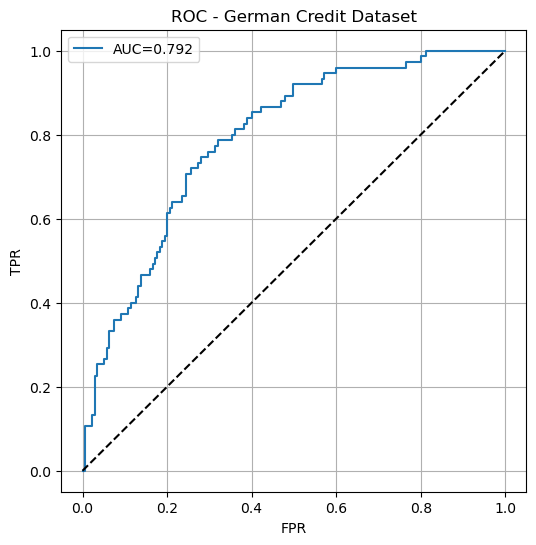

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC={auc:.3f}")
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC - German Credit Dataset")
plt.legend()
plt.grid()
plt.show()


## Extracción e interpretación de los coeficientes (betas)

El código muestra los coeficientes ordenados por impacto.

Betas positivos → aumentan PD.

Betas negativos → reducen PD.


- Permite validar si el modelo tiene sentido económico.
- Ayuda a detectar variables poco útiles (β ≈ 0).
- Identifica señales fuertes de riesgo o capacidad de pago.

* Es fundamental para:
* scorecards,
* model risk management,
* documentación regulatoria (Basilea),
* explicabilidad.

In [31]:
betas = pd.DataFrame({
    "variable": X_train.columns,
    "beta": logit.coef_[0]
}).sort_values("beta", ascending=False)
betas.head(15)


,variable,beta
47,foreign_worker_yes,0.869415
17,purpose_education,0.815079
14,purpose_new car,0.766926
21,purpose_repairs,0.505430
24,savings_status_<100,0.390377
7,checking_status_<0,0.359910
0,duration,0.344923
1,credit_amount,0.335002
2,installment_commitment,0.317443
36,property_magnitude_no known property,0.308149


### Matriz de Confusion

La matriz de confusión permite medir:

sensibilidad (TPR),
tasa de falsos positivos (FPR),
precisión
y errores críticos para decisiones crediticias.

TN FN
FP TP


| Celda                   | Nombre             | Qué significa                                                           | Impacto crediticio                                 |
| ----------------------- | ------------------ | ----------------------------------------------------------------------- | -------------------------------------------------- |
| **TN (True Negative)**  | Verdadero Negativo | Cliente **no defaulteó** y el modelo predijo **no default**             | ✔️ Buen cliente correctamente aceptado             |
| **FP (False Positive)** | Falso Positivo     | Cliente **NO defaulteó**, pero el modelo lo clasificó como **riesgoso** | ⚠️ Se rechaza un buen cliente → pérdida de negocio |
| **FN (False Negative)** | Falso Negativo     | Cliente **defaulteó**, pero el modelo lo clasificó como **no default**  | ❌ El peor error: genera pérdida financiera         |
| **TP (True Positive)**  | Verdadero Positivo | Cliente **defaulteó** y el modelo lo predijo correctamente              | ✔️ Riesgo evitado correctamente                    |


In [32]:
import numpy as np
best_thresh = thresholds[(tpr - fpr).argmax()]
y_pred_best = (pd_hat >= best_thresh).astype(int)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_best)


array([[126,  49],
       [ 19,  56]], dtype=int64)

##  Calibración del modelo de Probabilidad de Default (PD)
<!--  -->
Este bloque calcula una **tabla de calibración por deciles**, utilizada para evaluar si el modelo de Probabilidad de Default (PD) está correctamente calibrado.

1. Se crean deciles ordenando a los clientes desde PD más baja a PD más alta.
2. Para cada decil, se compara:
   - **pd_est:** la PD promedio estimada por el modelo.
   - **pd_real:** la tasa real de default observada.
3. Si pd_est y pd_real son similares en cada decil, el modelo está **bien calibrado**.
4. Si difieren mucho, el modelo **subestima o sobreestima el riesgo**, lo cual es crítico en modelos de crédito.

En resumen:  
👉 **Este código sirve para medir qué tan bien las probabilidades estimadas reflejan la realidad dentro de cada nivel de riesgo.**


In [33]:
df_eval = pd.DataFrame({"pd_hat": pd_hat, "default": y_test})
df_eval["decile"] = pd.qcut(df_eval["pd_hat"], 10, labels=False)

calibration = df_eval.groupby("decile").agg(
    pd_est=("pd_hat","mean"),
    pd_real=("default","mean"),
    n=("default","count")
)
calibration



,pd_est,pd_real,n
decile,,,
0,0.024382,0.00,25
1,0.055035,0.12,25
2,0.112170,0.04,25
3,0.159531,0.20,25
4,0.217736,0.20,25
5,0.284403,0.28,25
6,0.393021,0.52,25
7,0.513192,0.44,25
8,0.626351,0.44,25
